In [ ]:
# Titanic EDA — Task 5
**Objective:** Exploratory Data Analysis on Titanic dataset (missing values, distributions, correlations, relationships with Survival)
**Tools:** Python, pandas, matplotlib, seaborn


SyntaxError: invalid syntax (ipython-input-698175435.py, line 2)

In [ ]:
# Imports & visual settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = pd.DataFrame({'missing_count': missing, 'missing_pct': missing/len(df)*100})
missing[missing['missing_count']>0]


,missing_count,missing_pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [ ]:
for col in ['Sex','Embarked','Pclass','Survived']:
    if col in df.columns:
        print(col)
        print(df[col].value_counts(dropna=False))
        print()


Sex
Sex
male      577
female    314
Name: count, dtype: int64

Embarked
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Survived
Survived
0    549
1    342
Name: count, dtype: int64



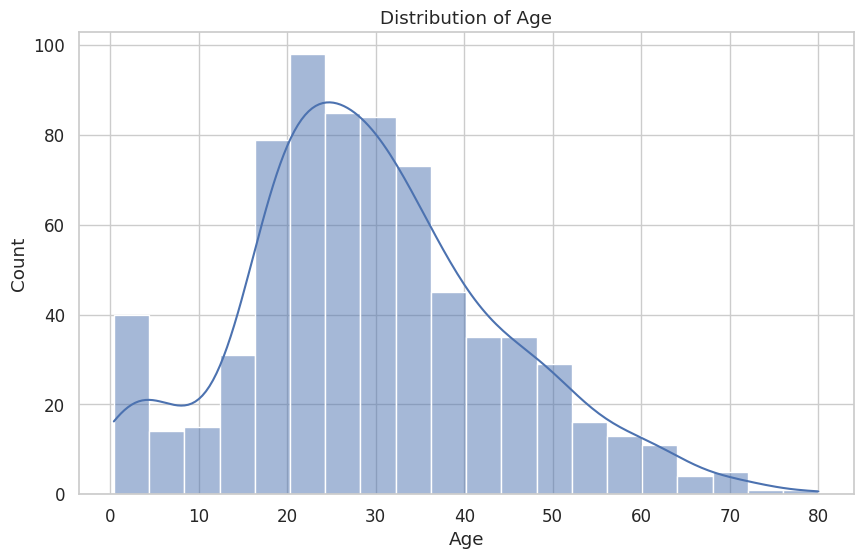

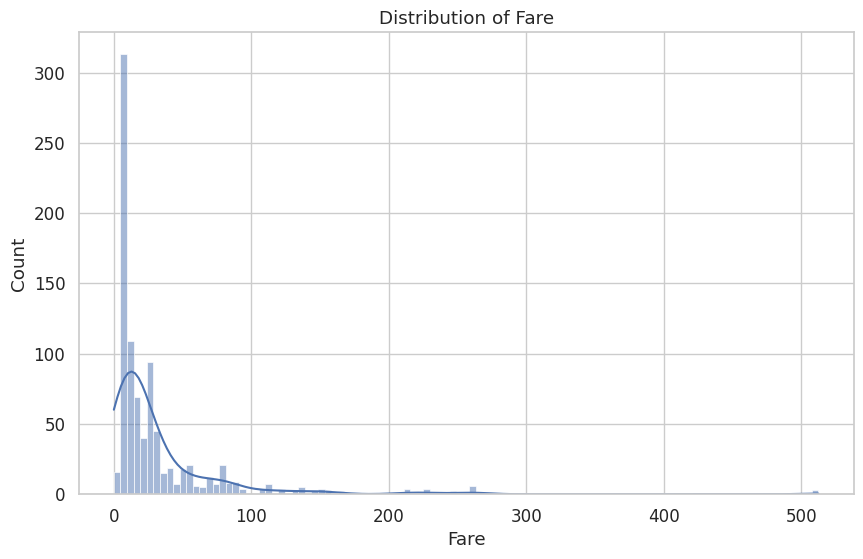

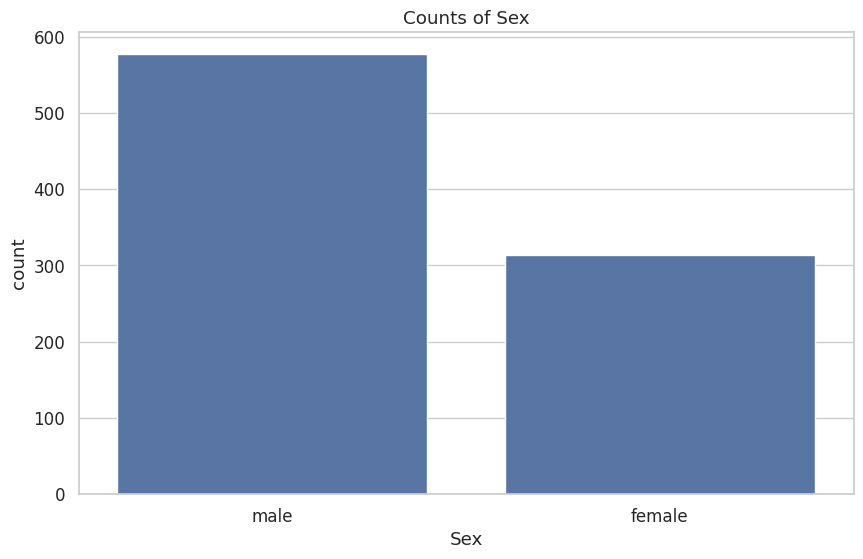

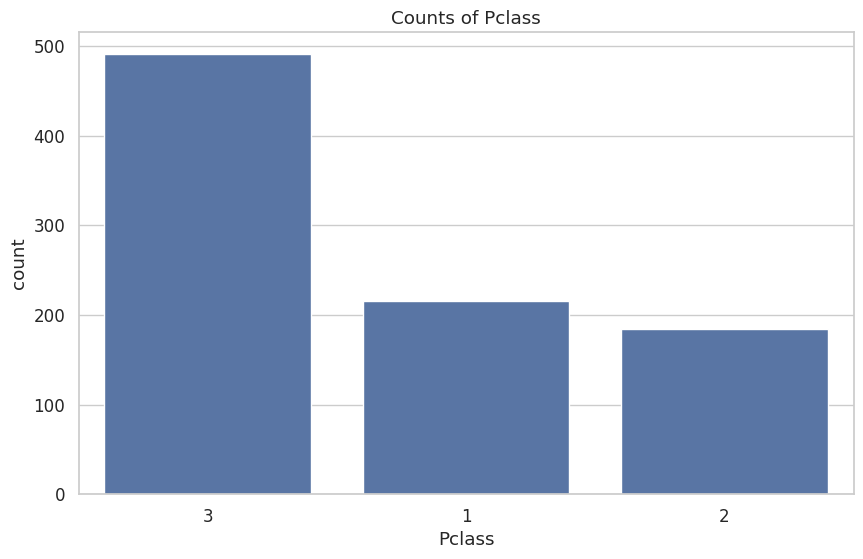

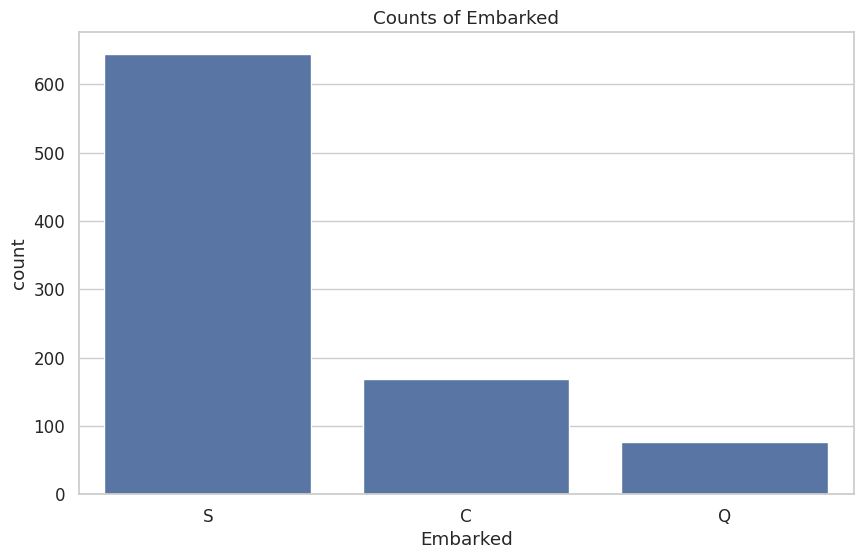

In [ ]:
# Numeric histograms
num_cols = ['Age','Fare']  # update if column names differ
for col in num_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Categorical counts
cat_cols = ['Sex','Pclass','Embarked']
for col in cat_cols:
    if col in df.columns:
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Counts of {col}')
        plt.show()


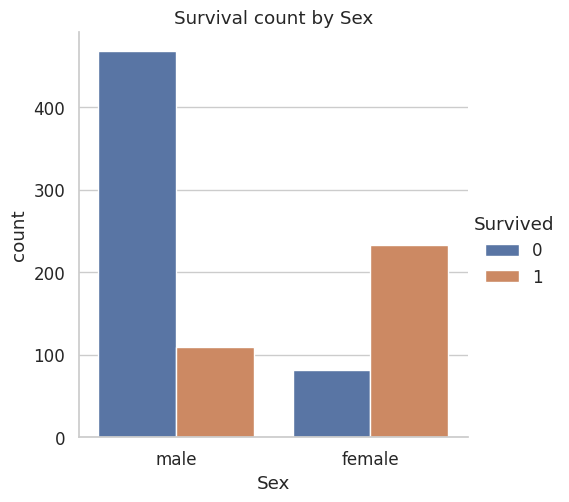

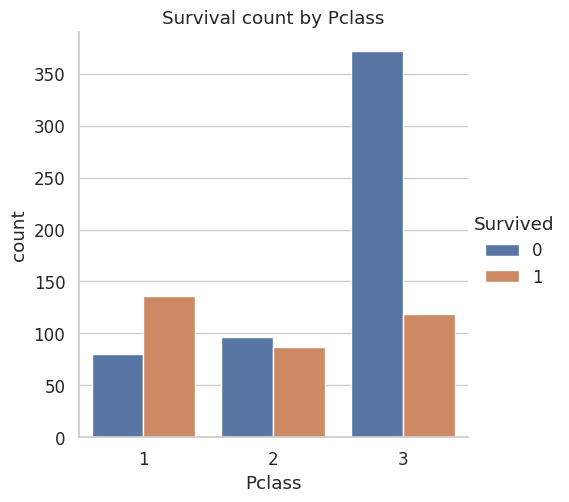

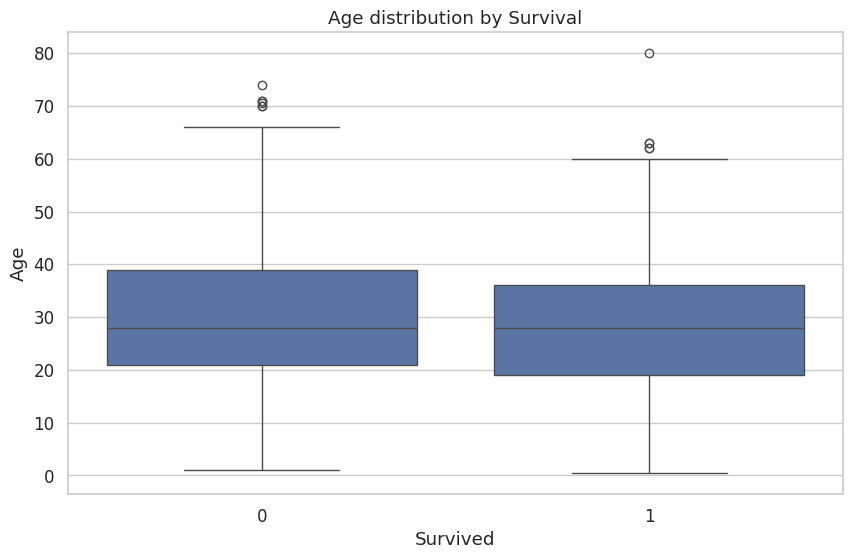

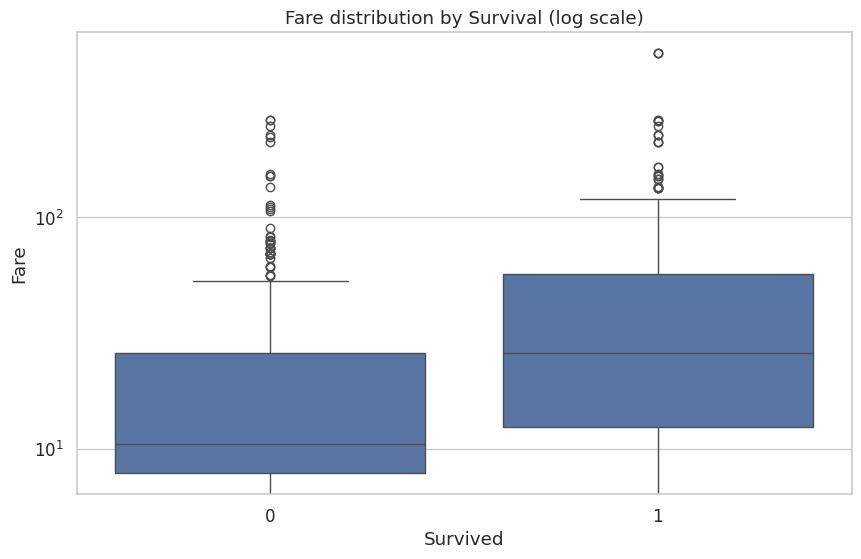

In [ ]:
# Survival rate by Sex and Pclass
if set(['Survived','Sex']).issubset(df.columns):
    sns.catplot(x='Sex', hue='Survived', kind='count', data=df)
    plt.title('Survival count by Sex')
    plt.show()

if set(['Survived','Pclass']).issubset(df.columns):
    sns.catplot(x='Pclass', hue='Survived', kind='count', data=df)
    plt.title('Survival count by Pclass')
    plt.show()

# Age and Fare by Survival
if set(['Survived','Age']).issubset(df.columns):
    plt.figure()
    sns.boxplot(x='Survived', y='Age', data=df)
    plt.title('Age distribution by Survival')
    plt.show()

if set(['Survived','Fare']).issubset(df.columns):
    plt.figure()
    sns.boxplot(x='Survived', y='Fare', data=df)
    plt.yscale('log')  # helps if Fare is skewed
    plt.title('Fare distribution by Survival (log scale)')
    plt.show()


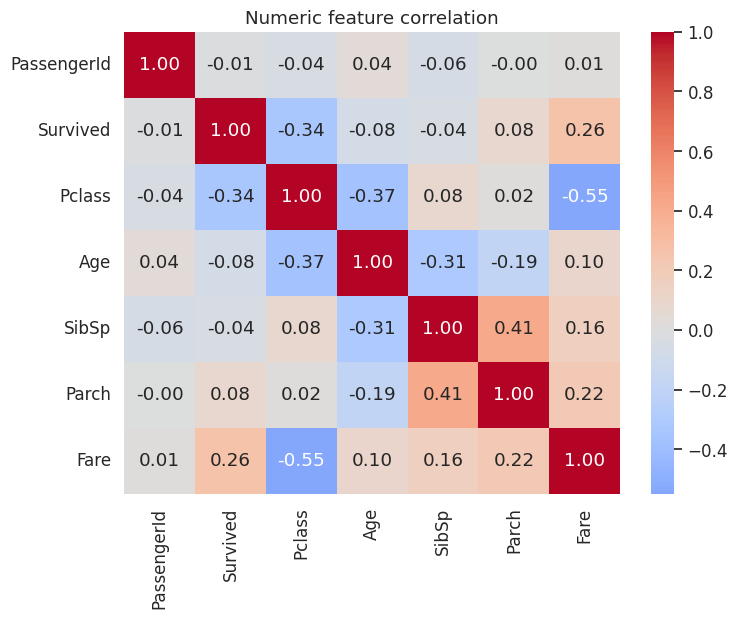

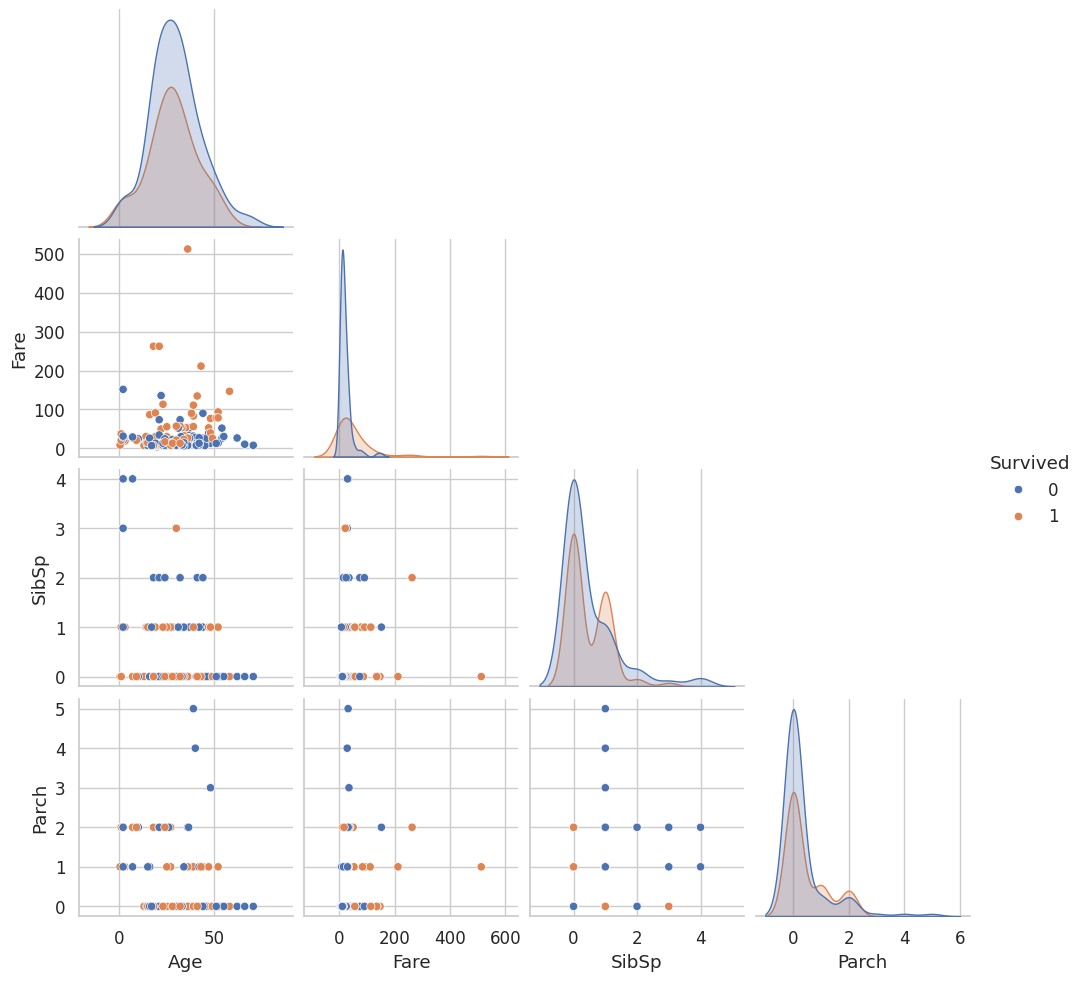

In [ ]:
# Correlation for numeric columns
numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Numeric feature correlation')
plt.show()

# Pairplot on sample to avoid slow plotting
cols_for_pair = [c for c in ['Age','Fare','SibSp','Parch','Survived'] if c in df.columns]
if len(cols_for_pair) >= 3:
    sns.pairplot(df[cols_for_pair].dropna().sample(frac=1.0 if len(df)<500 else 0.25), hue='Survived', corner=True)
    plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2395647959.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Col           2
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


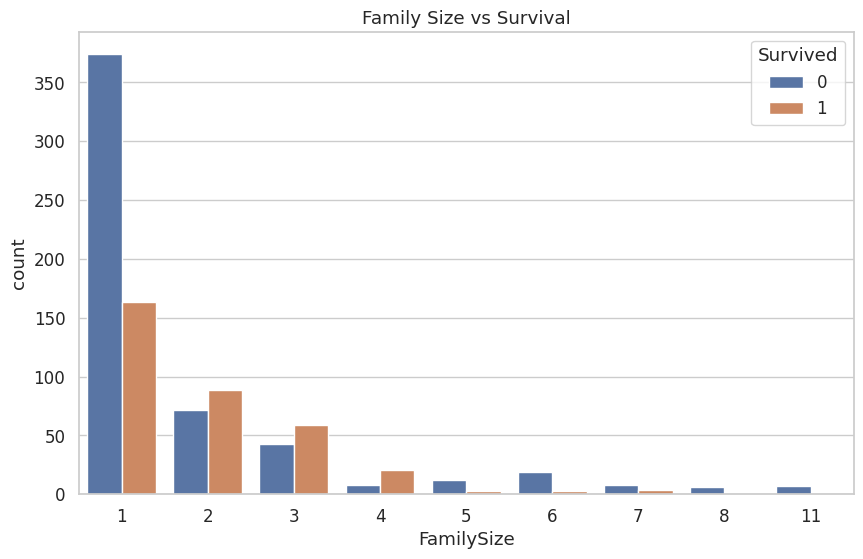

In [ ]:
# Extract title (if Kaggle 'Name' column exists)
if 'Name' in df.columns:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
    print(df['Title'].value_counts())

# Family size
if set(['SibSp','Parch']).issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    sns.countplot(x='FamilySize', hue='Survived', data=df)
    plt.title('Family Size vs Survival')
    plt.show()


In [ ]:
# Example: median impute Age, mode impute Embarked
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("Missing after imputation:")
print(df.isnull().sum()[df.isnull().sum()>0])


Missing after imputation:
Cabin    687
dtype: int64


/tmp/ipython-input-1897055534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1897055534.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 